In [23]:
import pandas as pd
from pre_analysis import *
from analysis import *
from plotting import *
import numpy as np

%matplotlib inline

In [24]:
# Setting plot sizes
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 7)})
sns.set(rc={'figure.dpi': 80})

In [25]:
# Loading the dataset
data_file = "datasets/transportation_network_providers.csv"
# n_rows ~= 101 Mil  # The full dataset, takes a while to process (~26Gb!)

# Instead, let's do a mini analysis
n_rows = 1000000
cdata = pd.read_csv(data_file, nrows=n_rows, index_col=0)
print("The first two rows of the dataset:")
cdata.head(2)

The first two rows of the dataset:


,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
Trip ID,,,,,,,,,,,,,,,,,,,,
d1b723bffc8de5155996db6d02a458c318c5c65c,08/03/2019 08:15:00 PM,08/03/2019 08:45:00 PM,1046,5.5,1.703108e+10,1.703122e+10,8.0,22.0,10.0,0,2.55,12.55,False,1,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043)
d1b724b0f1694273b5bbef93f30444e4127134e0,09/14/2019 04:30:00 PM,09/14/2019 04:45:00 PM,1236,6.6,1.703142e+10,1.703173e+10,42.0,73.0,10.0,0,2.55,12.55,True,1,41.776692,-87.610693,POINT (-87.6106933 41.7766915396),41.710615,-87.650581,POINT (-87.6505810959 41.7106148902)


In [5]:
# Checking for duplicate entries
assert cdata.append(cdata).shape[0] == 2 * cdata.shape[0]

# Checking for number of Null entries in rows
show_null_columns(cdata)

The following columns have Null values: 
{
    "Dropoff Census Tract": "2905",
    "Dropoff Centroid Latitude": "730",
    "Dropoff Centroid Location": "730",
    "Dropoff Centroid Longitude": "730",
    "Dropoff Community Area": "745",
    "Pickup Census Tract": "2851",
    "Pickup Centroid Latitude": "645",
    "Pickup Centroid Location": "645",
    "Pickup Centroid Longitude": "645",
    "Pickup Community Area": "655",
    "Trip Miles": "1"
} 



Let's extract useful information from the "timestamp" variables..

In [26]:
# Extracting information from "Tip Start Timestamp"
datetime_objects = cdata["Trip Start Timestamp"].apply(get_datetime_from_str)
set_start_date(datetime_objects)

cdata["Weekday"] = datetime_objects.apply(get_day_in_week)
cdata["Day Number"] = datetime_objects.apply(get_days_in_data)
cdata["Start Time in Minutes"] =  datetime_objects.apply(get_minutes_in_day)

cdata[["Trip Start Timestamp", "Weekday"]].head(5)

,Trip Start Timestamp,Weekday
Trip ID,,
d1b723bffc8de5155996db6d02a458c318c5c65c,08/03/2019 08:15:00 PM,5
d1b724b0f1694273b5bbef93f30444e4127134e0,09/14/2019 04:30:00 PM,5
d1b724e5c5e470bc2dd1ef52d217ac5fedc27053,09/11/2019 07:15:00 AM,2
d1b7257751106eb4de55ed05295862299539ba56,07/04/2019 06:00:00 PM,3
d1b725803fd46883dec3160f5d058263fce9c3a9,07/01/2019 07:15:00 PM,0


Here's an example of how you can view a quick scatterplot-grid for a subset of the variables.

In [28]:
# How total $ spent on cabs varies over the course of a day 
plot_data = cdata.groupby(['Day Number', 'Weekday', 'Start Time in Minutes'])["Fare"].sum().reset_index()
correlation_matrix(plot_data, ["Fare", "Start Time in Minutes", "Weekday"])
#scatter_grid(plot_data, ["Fare", "Start Time in Minutes", "Weekday"], s=20, cmap="GnBu")

,Weekday,Start Time in Minutes,Fare
Weekday,1.000000,0.000000,0.209461
Start Time in Minutes,0.000000,1.000000,0.596779
Fare,0.209461,0.596779,1.000000


Text(0.5, 0, 'Time of Day')

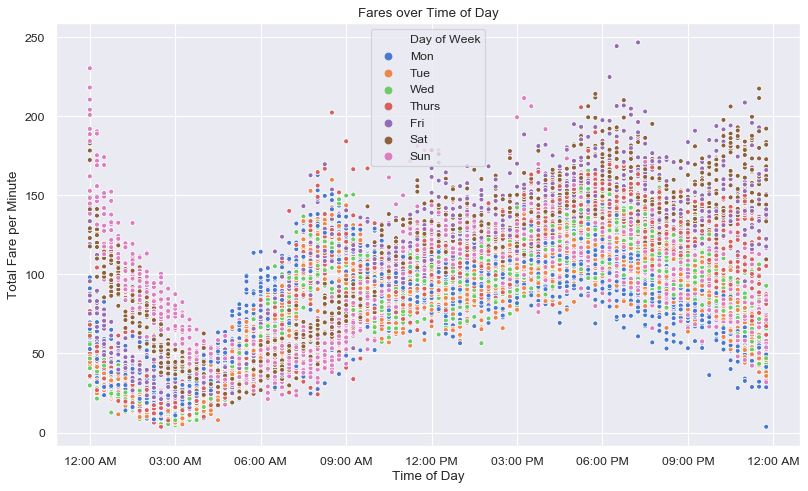

In [29]:
training_data = cdata.groupby(['Day Number', 'Weekday', 'Start Time in Minutes'])["Fare"].sum().reset_index()
training_data["Total Fare per Minute"] = training_data["Fare"]/15.0

plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", 
                  s=20, hue="Weekday", palette=sns.color_palette("muted", 7))

change_xticks_to_time(plot, n_ticks=9)
change_labels(plot, ["Day of Week"] + ["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plot.set_title("Fares over Time of Day")
plot.set_xlabel("Time of Day")

With that, we begin trying different regression models, starting with the most basic one, <br>
### Ordinary LS Linear Regression 
#### with One Quantitative Predictor and No Feature-Scaling

In [41]:
n_epochs = 1000

# Creating the model
unscaled_lr = RegModel(inputs=["Start Time in Minutes"], 
                  outputs=["Total Fare per Minute"], 
                  learning_rate=0.000001,
                  scale_features=False
                )

# Fitting the data
losses = unscaled_lr.fit_data(training_data, epochs=n_epochs)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", s=20)

# Plotting regression line
plot = unscaled_lr.regression_line_1()

change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Incomplete Regression (Fares ~ Time)")
plot.set_xlabel("Time of Day");

KeyboardInterrupt: 

That line doesn't look right! If we look at the loss function, it looks like the neural net has not converged yet..

Text(0.5, 1.0, 'Neural Net Convergence')

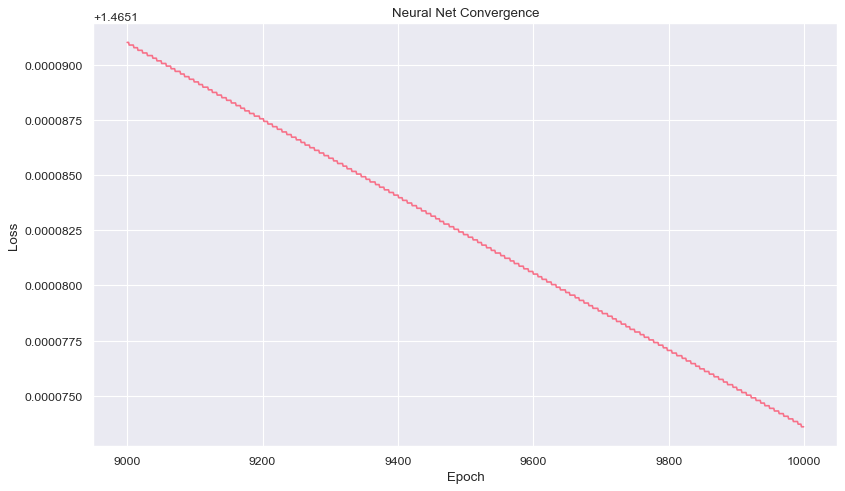

In [24]:
plot_data = pd.DataFrame()
l_limit = 9000
u_limit = len(losses)
plot_data["Epoch"] = range(l_limit, u_limit)
plot_data["Loss"] = [float(l) for l in losses[l_limit:u_limit]]
plot = line_xy(x="Epoch", y="Loss", data=plot_data)
plot.set_title("Neural Net Convergence")

In [25]:
# Wait, our regression line is supposed to pass through the observation mean!
print("Predicted Y_mean :",
      unscaled_lr.predict([training_data["Start Time in Minutes"].mean()]), 
      "Actual Y_mean", 
      training_data["Total Fare per Minute"].mean())

Predicted Y_mean : [1.3801122] Actual Y_mean 1.4530145031763153


To see why the neural net doesn't learn the regression model, we consider the following 'toy' fitting problem... 

### OLS Linear Regression of y = x^2

Predicted Y_mean : [3641.988] Actual Y_mean 3383.5
Adjusted R^2 is 0.9086761850232717
Weights and biases [Parameter containing:
tensor([[85.3294]], requires_grad=True), Parameter containing:
tensor([-667.1472], requires_grad=True)]


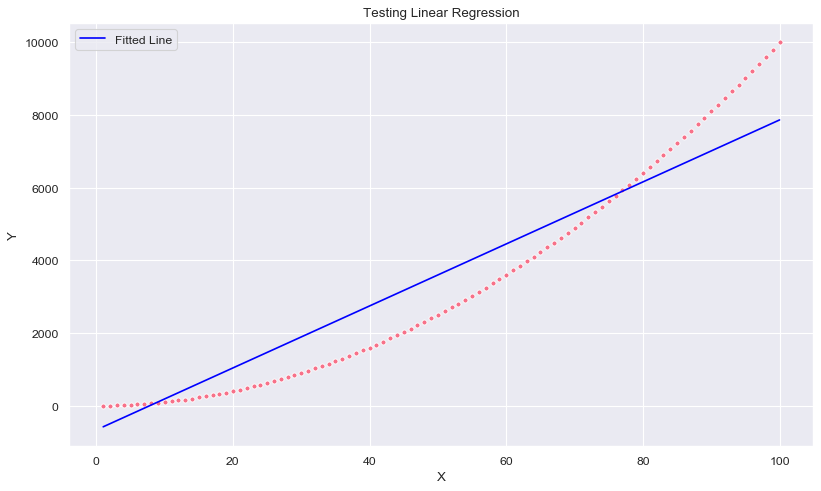

In [26]:
test_data = pd.DataFrame()
test_data["X"] = np.linspace(1,100,100)
test_data["Y"] = test_data["X"]**2

test_model = RegModel(inputs=["X"], outputs=["Y"], learning_rate=0.0001, scale_features = False)

losses = test_model.fit_data(test_data, epochs=10000)
fitted_values = [test_model.predict([x])[0] for x in test_data["X"]]

plot = scatter_xy(test_data, x="X", y="Y", s=20)
plot.set_title("Testing Linear Regression")
line_xy(test_data["X"], fitted_values, label="Fitted Line", color="blue")

X, Y = test_model.XY_from_data(test_data)
print("Predicted Y_mean :",test_model.predict([test_data["X"].mean()]), "Actual Y_mean", test_data["Y"].mean())
test_model.compute_residuals(test_data)

dfe = n_rows - 2 - 1
dft = n_rows
print("Adjusted R^2 is", 1 - (test_model.sse/dfe) / (test_model.sst/dft))
print("Weights and biases", list(test_model.parameters()))

The reason we are unable to get an unbiased regression is because in many iterative machine-learning algorithms, the outlier points 'pull' the regression line towards them.

With neural networks in particular, since the network computes gradients of one feature wrt. another, the relative scaling between features can slow down convergence, cause divergence, or as in our case, prevent us from ariving at the converged regression model.

Note that this problem is unique to certain ML methods, since Least Squares regression performance does not get affected by standardization of variables; Only the regression coefficients change.

To solve this, we use the StandardScaler() from sci-kit learn, to standardize and normalize both the input and output features.

Predicted Y_mean : [3383.5] Actual Y_mean 3383.5
Adjusted R^2 is 0.9386605854374711
Weights and biases [Parameter containing:
tensor([[0.9689]], requires_grad=True), Parameter containing:
tensor([-1.7537e-09], requires_grad=True)]


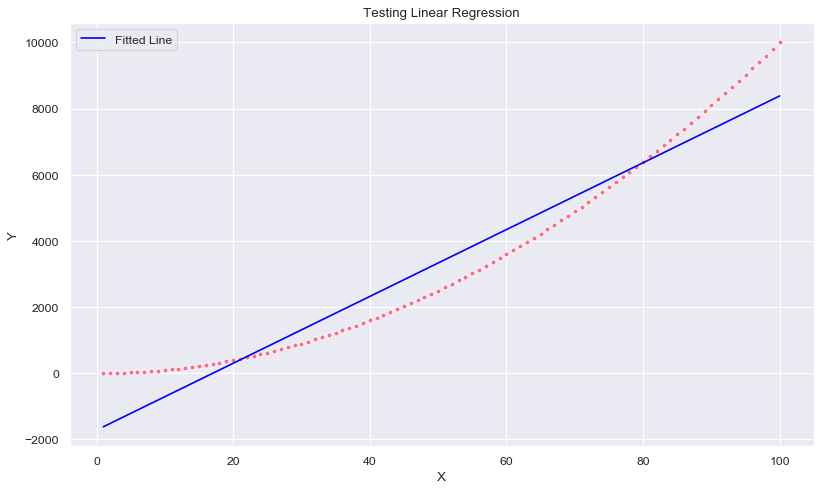

In [27]:
test_scaled = RegModel(inputs=["X"], outputs=["Y"], learning_rate=0.1, scale_features=True)

losses = test_scaled.fit_data(test_data, epochs=100)
fitted_values = [test_scaled.predict([x])[0] for x in test_data["X"]]

plot = scatter_xy(test_data, x="X", y="Y", s=20)
plot.set_title("Testing Linear Regression")
line_xy(test_data["X"], fitted_values, label="Fitted Line", color="blue")

X, Y = test_scaled.XY_from_data(test_data)
print("Predicted Y_mean :",test_scaled.predict([test_data["X"].mean()]), "Actual Y_mean", test_data["Y"].mean())
test_scaled.compute_residuals(test_data)

dfe = n_rows - 2 - 1
dft = n_rows
print("Adjusted R^2 is", 1 - (test_scaled.sse/dfe) / (test_scaled.sst/dft))
print("Weights and biases", list(test_scaled.parameters()))

Not only are we getting an unbiased estimation, we are able to increase the learning rate (and decrease the number of epochs) to fit the model much more efficiently.

Let us revisit the Chicago Rideshare data, but this time we use scaled features.

### Ordinary LS Linear Regression 
#### with One Quantitative Predictor and Feature-Scaling enabled

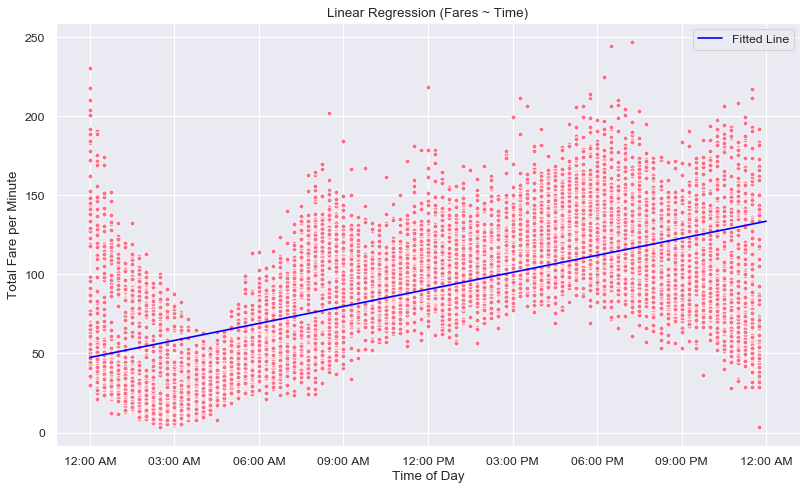

In [32]:
n_epochs = 10000

# Creating the model
scaled_lr = RegModel(inputs=["Start Time in Minutes"], 
                  outputs=["Total Fare per Minute"], 
                  learning_rate=0.001,
                  scale_features=True
                )

# Fitting the data
losses = scaled_lr.fit_data(training_data, epochs=n_epochs)
scaled_lr.compute_residuals(training_data)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", s=20)

# Plotting regression line
plot = scaled_lr.regression_line_1()

change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Linear Regression (Fares ~ Time)")
plot.set_xlabel("Time of Day");

Text(0.5, 1.0, 'Neural Net Convergence (Linear Model)')

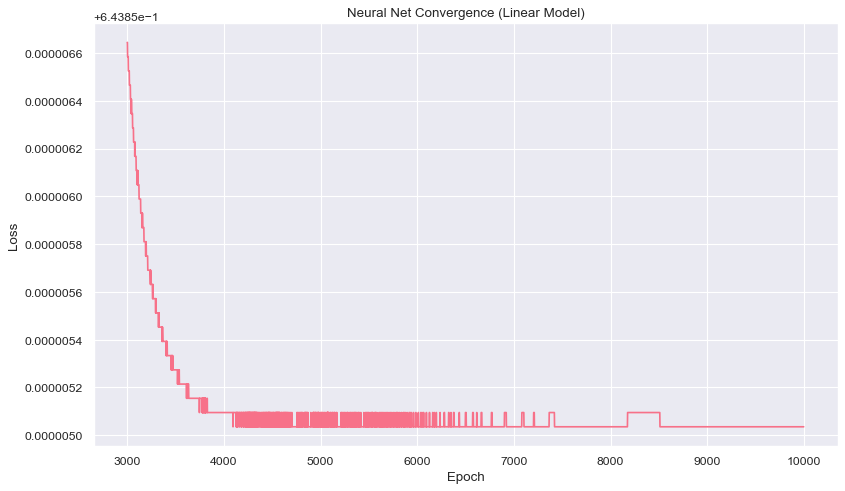

In [34]:
plot_data = pd.DataFrame()
l_limit = 3000
u_limit = 10000
plot_data["Epoch"] = range(l_limit, u_limit)
plot_data["Loss"] = [float(l) for l in losses[l_limit:u_limit]]
plot = line_xy(x="Epoch", y="Loss", data=plot_data)
plot.set_title("Neural Net Convergence (Linear Model)")

In [35]:
# And sure enough, it passes through the mean
print("Predicted Y_mean :",
      scaled_lr.predict([training_data["Start Time in Minutes"].mean()])) 
print("Actual Y_mean", 
      training_data["Total Fare per Minute"].mean())

Predicted Y_mean : [90.092384]
Actual Y_mean 90.09238724611708


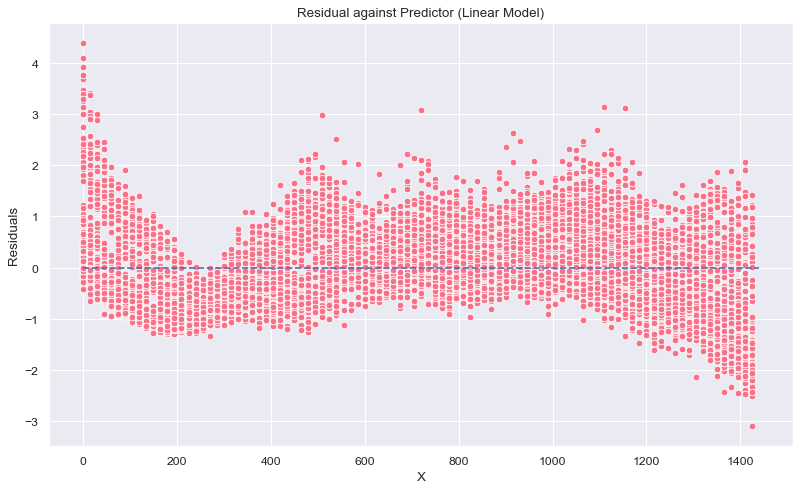

In [36]:
# Plotting the residuals
plot = scatter_xy(y="Residuals", x="Start Time in Minutes", data=scaled_lr.fitted)
plot.set_title("Residual against Predictor (Linear Model)")
plot.set_xlabel("X")
plt.plot([0, 1440], [0,0], "b--")

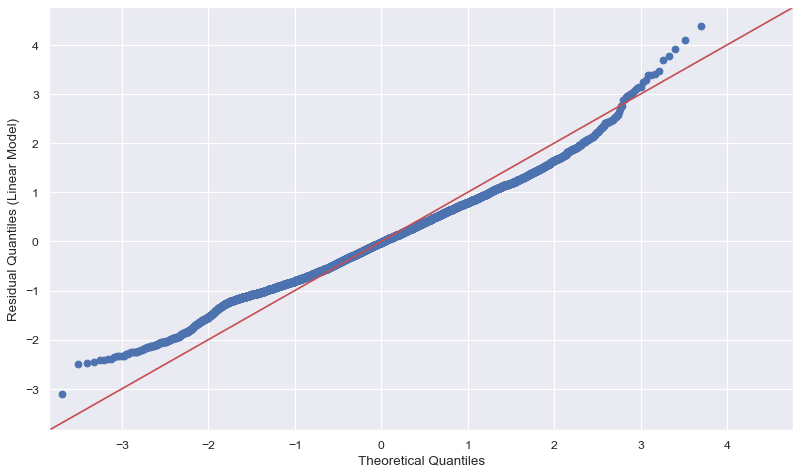

In [37]:
# QQ Plot of Residuals
import statsmodels.api as sm
_ = sm.qqplot(scaled_lr.fitted["Residuals"], ylabel="Residual Quantiles (Linear Model)", xlabel="Theoretical Quantiles", 
              line="45")

Let's try fitting a non-linear model through the same data.

### Non-Linear Regression 
#### with One Quantitative Predictor and Feature-Scaling enabled

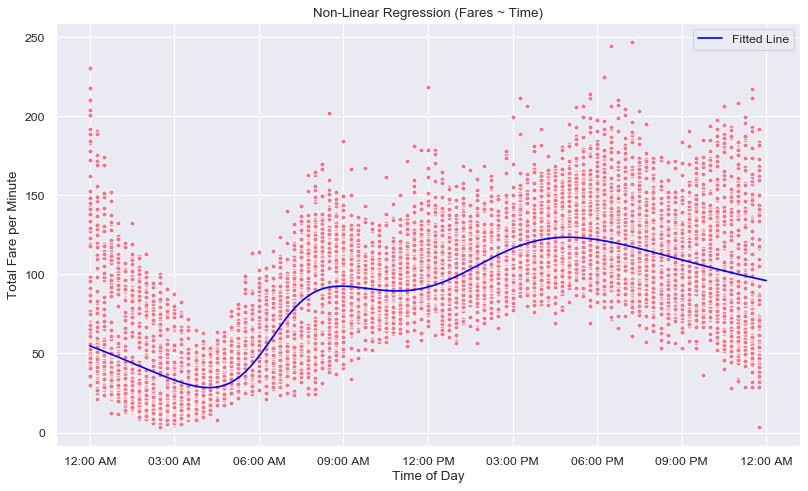

In [38]:
# Creating the model
scaled_nlr = RegModel(inputs=["Start Time in Minutes"], 
                  outputs=["Total Fare per Minute"], 
                  learning_rate=1000.0/n_epochs,
                  scale_features=True,
                  linear = False
                )

# Fitting the data
losses = scaled_nlr.fit_data(training_data, epochs=10*n_epochs)
scaled_nlr.compute_residuals(training_data)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", s=20)

# Plotting regression line
plot = scaled_nlr.regression_line_1()

change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Non-Linear Regression (Fares ~ Time)")
plot.set_xlabel("Time of Day");

Text(0.5, 1.0, 'Neural Net Convergence (Linear Model)')

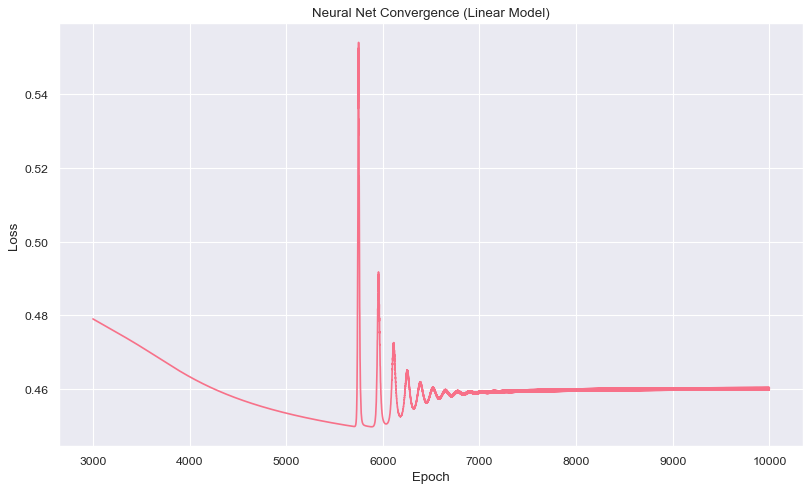

In [39]:
plot_data = pd.DataFrame()
l_limit = 3000
u_limit = 10000
plot_data["Epoch"] = range(l_limit, u_limit)
plot_data["Loss"] = [float(l) for l in losses[l_limit:u_limit]]
plot = line_xy(x="Epoch", y="Loss", data=plot_data)
plot.set_title("Neural Net Convergence (Linear Model)")

In [40]:
# Let's check if it still passes through the mean?
print("Predicted Y_mean :",
      scaled_nlr.predict([training_data["Start Time in Minutes"].mean()])) 
print("Actual Y_mean", 
      training_data["Total Fare per Minute"].mean())

Predicted Y_mean : [91.492195]
Actual Y_mean 90.09238724611708


In [41]:
# Sadly (and as expected), it doesn't pass through the mean. 
# But it does capture the trend much better!
print("SSE (of Non-linear Model) is", scaled_nlr.sse)
print("SSE (of Linear Model) is", scaled_lr.sse) 
print("SSTE =", scaled_lr.sst if scaled_lr.sst == scaled_nlr.sst else "Error")

SSE (of Non-linear Model) is 4104.025547664942
SSE (of Linear Model) is 5748.337959231178
SSTE = 8928.0


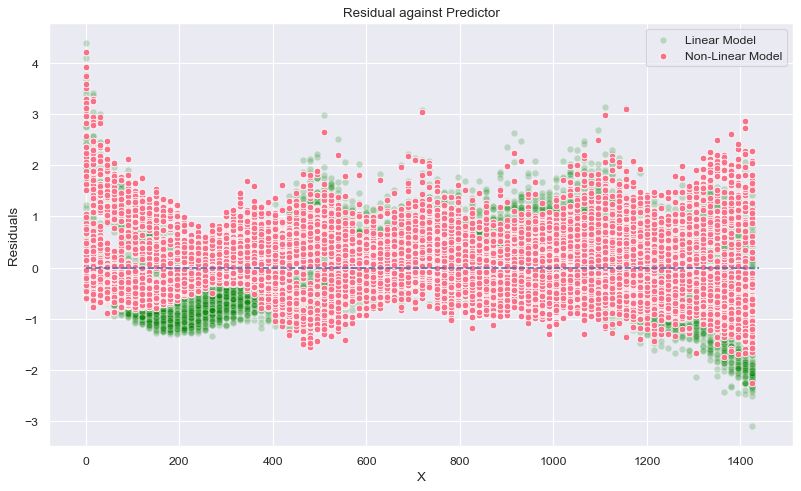

In [42]:
# Plotting the residuals
plot = scatter_xy(y="Residuals", x="Start Time in Minutes", 
                  data=scaled_lr.fitted, color="green", alpha=0.2, label="Linear Model")
plot = scatter_xy(y="Residuals", x="Start Time in Minutes", 
                  data=scaled_nlr.fitted, label="Non-Linear Model")
plot.set_title("Residual against Predictor")
plot.set_xlabel("X")
plt.plot([0, 1440], [0,0], "b--")

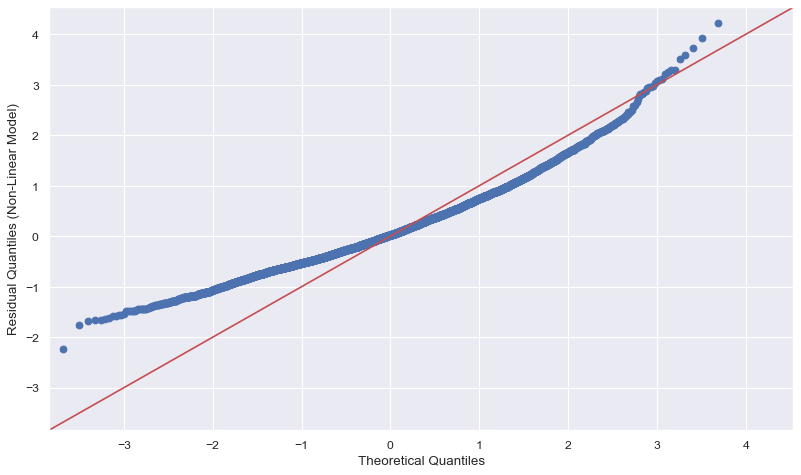

In [44]:
# QQ Plot of Residuals
_ = sm.qqplot(scaled_nlr.fitted["Residuals"], ylabel="Residual Quantiles (Non-Linear Model)", xlabel="Theoretical Quantiles", line="45")

In [ ]:
outliers = scaled_nlr.get_outliers_from_residuals(limits=[-6,6])

# Removing outliers
no_outliers_nlr = RegModel(inputs=["Start Time in Minutes"], 
                           outputs=["Total Fare per Minute"], 
                           learning_rate=1000.0/n_epochs,
                           scale_features=True,
                           linear = False
                 )
no_outliers_nlr.fit_data(training_data, epochs=10*n_epochs, outliers=outliers)
no_outliers_nlr.compute_residuals(training_data, outliers=outliers)

In [ ]:
# Plotting the residuals
plot = scatter_xy(y="Residuals", x="Start Time in Minutes", 
                  data=scaled_nlr.fitted, color="green", alpha=0.2, label="Non-Lin. Model with Outliers")
plot = scatter_xy(y="Residuals", x="Start Time in Minutes", 
                  data=no_outliers_nlr.fitted, label="Non-Lin. Model without Outliers")
plot.set_title("Residual against Predictor")
plot.set_xlabel("X")
plt.plot([0, 1440], [0,0], "b--")

In [ ]:
# QQ Plot of residuals against Normal Quantiles, looks better
_ = sm.qqplot(no_outliers_nlr.fitted["Residuals"], ylabel="Residual Quantiles (Non-Linear Model)", xlabel="Theoretical Quantiles", 
              line="45")

In [45]:
# QQ Plot of residuals against Skew-Normal Quantiles
no_outliers_nlr = scaled_nlr
import scipy.stats as ss
param = 9
location = -0.8
_ = sm.qqplot(no_outliers_nlr.fitted["Residuals"], ylabel="Residual Quantiles (Non-Linear Model)", xlabel="Theoretical Quantiles", 
              line="45", dist=ss.skewnorm, distargs=(param,), loc=location)

AttributeError: 'rv_frozen' object has no attribute 'name'

So our error terms seem to skew-normally distributed

In [ ]:
x = np.linspace(-3,3,100)
y = ss.skewnorm.pdf(x, param, loc=location)
p = line_xy(x,y)
p.set_title(f"Distribution of Error terms : Skew Normal({param}))")

Finally, let's convert Weekday into Categorical variables.

In [46]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
c_variables = []
for ind, name in enumerate(weekdays):
    c_variables.append([])
    for day_index in training_data["Weekday"]:
        c_variables[ind].append(float(ind == day_index))
    training_data[name] = c_variables[ind]

In [21]:
training_data[["Start Time in Minutes"]+weekdays+["Total Fare per Minute"]].head(5)

,Start Time in Minutes,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Total Fare per Minute
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.500000
1,15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667
2,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.666667
3,45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.666667
4,60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.666667


In [57]:
outliers = []
# Creating the model
categ_lr = RegModel(inputs=["Start Time in Minutes"] + weekdays, 
                  outputs=["Total Fare per Minute"], 
                  learning_rate=100.0/n_epochs,
                  scale_features=True,
                  linear = True
                )

# Fitting the data
losses = categ_lr.fit_data(training_data, epochs=5*n_epochs, outliers=outliers)
categ_lr.compute_residuals(training_data, outliers=outliers)

(0, 200)

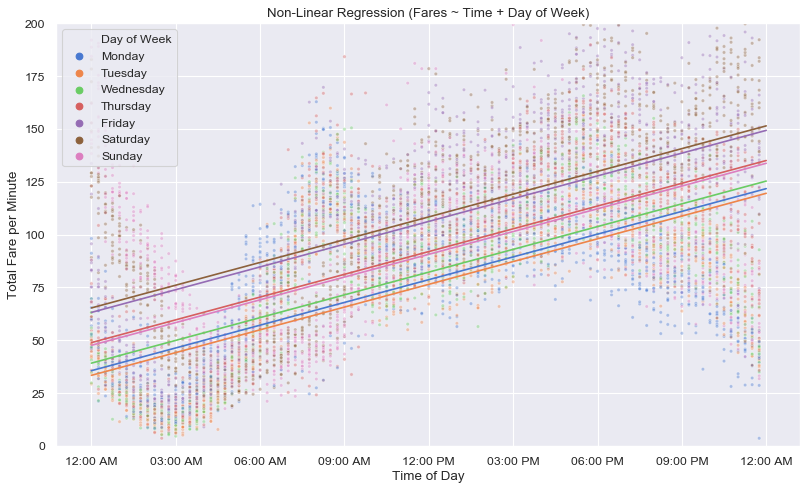

In [59]:
colors = sns.color_palette("muted", n_colors=7)

# Plotting regression line
categ_lr.regression_lines_2(range(7), colors)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", 
                  hue="Weekday", palette=colors, s=10, alpha = 0.4)
change_labels(plot, ["Day of Week"] + weekdays)
change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Non-Linear Regression (Fares ~ Time + Day of Week)")
plot.set_xlabel("Time of Day");
plt.ylim(0,200)

In [61]:
# Creating the model
categ_nlr = RegModel(inputs=["Start Time in Minutes"] + weekdays, 
                  outputs=["Total Fare per Minute"], 
                  learning_rate=1000.0/n_epochs,
                  scale_features=True,
                  linear = False
                )

# Fitting the data
losses = categ_nlr.fit_data(training_data, epochs=20*n_epochs, outliers=outliers)
categ_nlr.compute_residuals(training_data, outliers=outliers)

(0, 200)

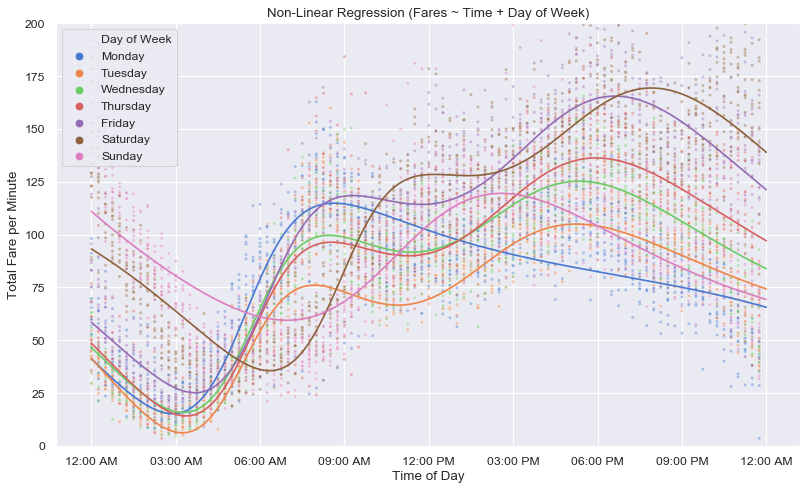

In [62]:
colors = sns.color_palette("muted", n_colors=7)

# Plotting regression line
categ_nlr.regression_lines_2(range(7), colors)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", 
                  hue="Weekday", palette=colors, s=10, alpha = 0.4)
change_labels(plot, ["Day of Week"] + weekdays)
change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Non-Linear Regression (Fares ~ Time + Day of Week)")
plot.set_xlabel("Time of Day");
plt.ylim(0,200)

(0, 200)

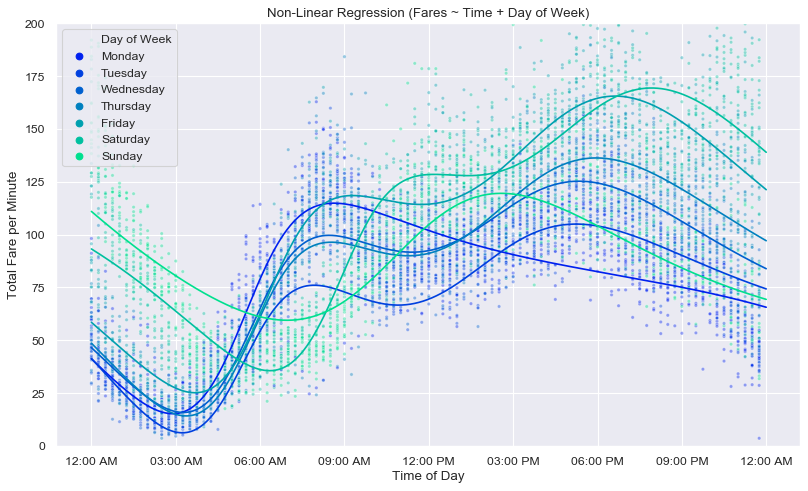

In [63]:
colors = sns.color_palette("winter", n_colors=7)

# Plotting regression line
categ_nlr.regression_lines_2(range(7), colors)

# Plotting observations
plot = scatter_xy(training_data, x="Start Time in Minutes", y="Total Fare per Minute", 
                  hue="Weekday", palette=colors, s=10, alpha = 0.4)
change_labels(plot, ["Day of Week"] + weekdays)
change_xticks_to_time(plot, n_ticks=9)
plot.set_title("Non-Linear Regression (Fares ~ Time + Day of Week)")
plot.set_xlabel("Time of Day");
plt.ylim(0, 200)

In [65]:
models = [scaled_lr, scaled_nlr, categ_lr, categ_nlr]
for i, model in enumerate(models):
    print("SSE of model", i+1, "is", model.sse)

SSE of model 1 is 5748.337959231178
SSE of model 2 is 4104.025547664942
SSE of model 3 is 5040.447808816521
SSE of model 4 is 1917.118046977256


In [66]:
for i, model in enumerate(models):
    print("SSR of model", i+1, "is", model.sst - model.sse)

SSR of model 1 is 3179.6620407688224
SSR of model 2 is 4823.974452335058
SSR of model 3 is 3887.5521911834794
SSR of model 4 is 7010.881953022744


In [102]:
n = n_rows
ps = [2, 10, 9, 41]

In [105]:
for p, model in zip(ps, models):
    print("R^2 is", 1 - (model.sse/model.sst), "AdjR^2 is", 1 - ((model.sse/model.sst)*(n/(n-p-1))))

R^2 is 0.356144941842386 AdjR^2 is 0.3561430102714167
R^2 is 0.5403197191235505 AdjR^2 is 0.5403146625848388
R^2 is 0.43543371317019264 AdjR^2 is 0.43542806745086715
R^2 is 0.7852690359568486 AdjR^2 is 0.7852600168775574


In [117]:
Cps = []
for p, model in zip(ps, models):
    Cps.append((model.sse/models[-1].sse)*(n - ps[-1] - 1) - n + 2*p)

In [118]:
Cps

[2.998426710496338, 2.1407265734813827, 2.629179677674965, 1.0]

In [120]:
(5040 - 1917.1)/5040.4

0.6195738433457663